In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


#**Data Loading and Preprocessing**

In [38]:
#from google.colab import drive
#drive.mount('/content/drive')

store_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales Forecast using Linear Regression/train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
store_sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


**Checking for null values**

In [41]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


**Converting date from object to dateTime datatype**

In [123]:
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales['year'] = store_sales['date'].dt.year
store_sales['month'] = store_sales['date'].dt.month
store_sales['day_of_week'] = store_sales['date'].dt.dayofweek

store_sales.head()

,date,store,item,sales,year,month,day_of_week
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [53]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
 4   year    913000 non-null  int32         
 5   month   913000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3)
memory usage: 34.8 MB


# **Visualization**

In [132]:
monthly_sales = store_sales.groupby(['year', 'month'], as_index=False)['sales'].sum()

# Create a date column for plotting
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Drop the 'year' and 'month' columns as they are no longer needed
monthly_sales.drop(['year', 'month'], axis=1, inplace=True)

monthly_sales.head(10)

,sales,date
0,454904,2013-01-01
1,459417,2013-02-01
2,617382,2013-03-01
3,682274,2013-04-01
4,763242,2013-05-01
5,795597,2013-06-01
6,855922,2013-07-01
7,766761,2013-08-01
8,689907,2013-09-01
9,656587,2013-10-01


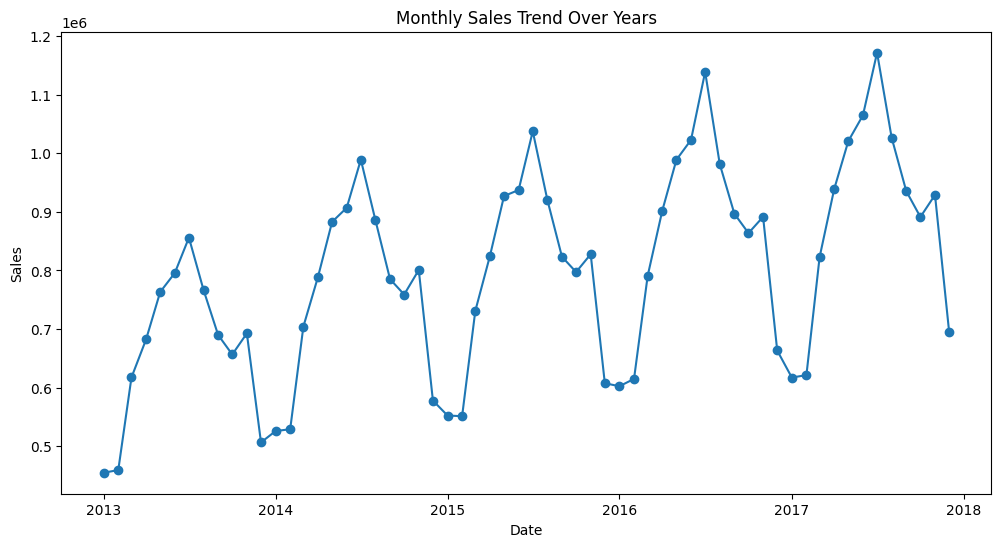

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['sales'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend Over Years')

plt.show()


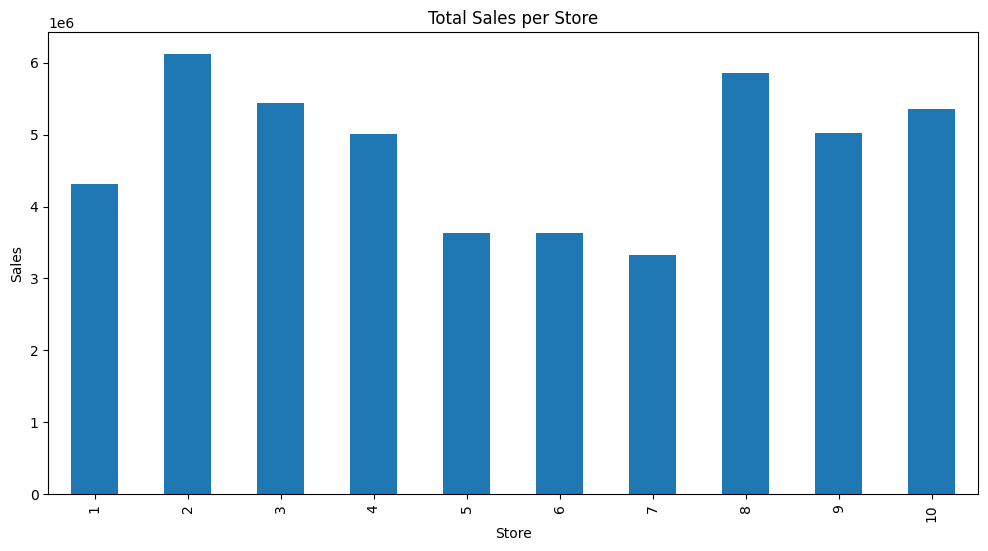

In [131]:
plt.figure(figsize=(12,6))
store_sales.groupby('store')['sales'].sum().plot(kind='bar')
plt.title('Total Sales per Store')
plt.xlabel('Store')
plt.ylabel('Sales')

plt.show()

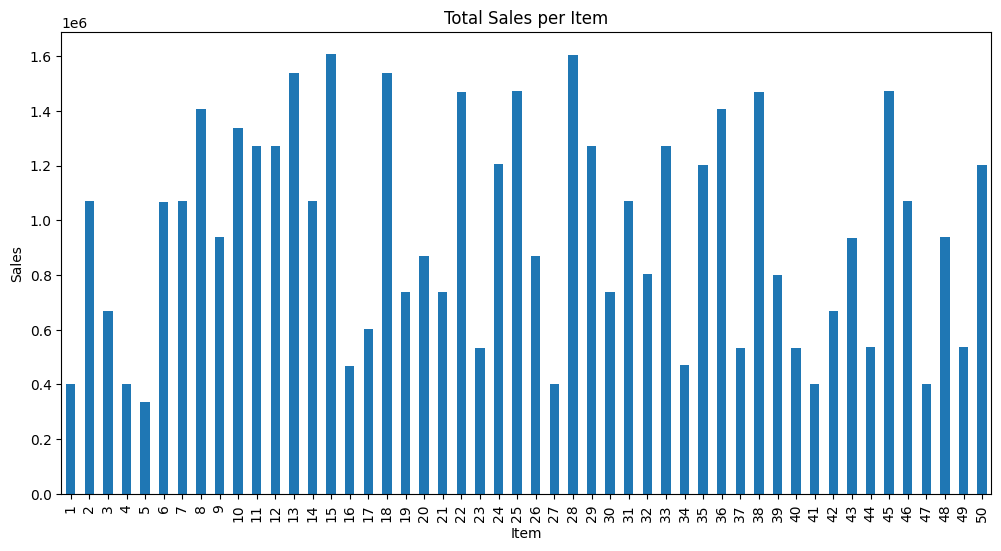

In [118]:
plt.figure(figsize=(12,6))
store_sales.groupby('item')['sales'].sum().plot(kind='bar')
plt.title('Total Sales per Item')
plt.xlabel('Item')
plt.ylabel('Sales')
plt.show

**Preparing training and test data**

In [55]:
X = store_sales[['store', 'year', 'month']]
y = store_sales['sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# **Model Training**

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Model Evaluation**

In [124]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = model.score(X_test, y_test)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 22.68692590747423
RMSE: 28.16962390024577
R^2: 0.04186050698532573
